In [1]:
#1. Мәліметтерді жүктеу және зерттеу
import seaborn as sns

# Мәліметтер жиынтығын жүктейміз
df = sns.load_dataset("penguins")

# Мәліметтер құрылымын қарап шығамыз
print(df.info())

# Мәліметтердің статистикалық сипаттамасын аламыз
print(df.describe())

# Жетіспейтін мәндерді тексереміз
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550

In [7]:
#2. Мәліметтерді алдын ала өңдеу
# Жетіспейтін мәндерді медианамен толтыру
df['bill_length_mm'].fillna(df['bill_length_mm'].median(), inplace=True)
df['bill_depth_mm'].fillna(df['bill_depth_mm'].median(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(), inplace=True)

# Категориялық мәндер үшін ең жиі кездесетін мәнмен толтыру
df['species'].fillna(df['species'].mode()[0], inplace=True)
df['island'].fillna(df['island'].mode()[0], inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)


In [3]:
#2.2. Категориялық белгілерді кодтау
from sklearn.preprocessing import LabelEncoder

# LabelEncoder қолданамыз
label_encoder = LabelEncoder()

df['species'] = label_encoder.fit_transform(df['species'])
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])


In [10]:
label_encoder = LabelEncoder()
y = df['species']  # Категориальные метки

# Обучаем на всех метках
label_encoder.fit(y)

# Применяем преобразование к y_train и y_test_pred
y_test_pred_inverse = label_encoder.inverse_transform(y_test_pred)

# Создаем файл с результатами
output = pd.DataFrame({'id': range(1, len(y_test_pred) + 1), 'species': y_test_pred_inverse})
output.to_csv('submission.csv', index=False)


In [4]:
#Деректерді оқыту және тест жиынтықтарына бөлу
from sklearn.model_selection import train_test_split

# Деректерді оқыту және тест жиынтықтарына бөлу
X = df.drop('species', axis=1)  # Белгілер
y = df['species']  # Мақсатты айнымалы

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
#Сандық белгілерді масштабтау
from sklearn.preprocessing import StandardScaler

# Масштабтау
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
#Машиналық оқыту моделін үйрету

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Модельді оқытамыз
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Модельдің сапасын бағалау
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [12]:
#4. Kaggle үшін болжау файлын жасау
# Тест жиынтығындағы болжау нәтижелерін алу
y_test_pred = model.predict(X_test)

# CSV файлына жазу
import pandas as pd
output = pd.DataFrame({'id': range(1, len(y_test_pred) + 1), 'species': label_encoder.inverse_transform(y_test_pred)})
output.to_csv('submission.csv', index=False)


In [11]:
print("Метки в y_test_pred:", set(y_test_pred))



Метки в y_test_pred: {0, 1, 2}


In [14]:
#Feature Engineering — жаңа белгілерді қосу. Мысалы, тұмсық ұзындығы мен дене массасының қатынасы:
df['bill_mass_ratio'] = df['bill_length_mm'] / df['body_mass_g']


C:\Users\14ken\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\14ken\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\14ken\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\14ken\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

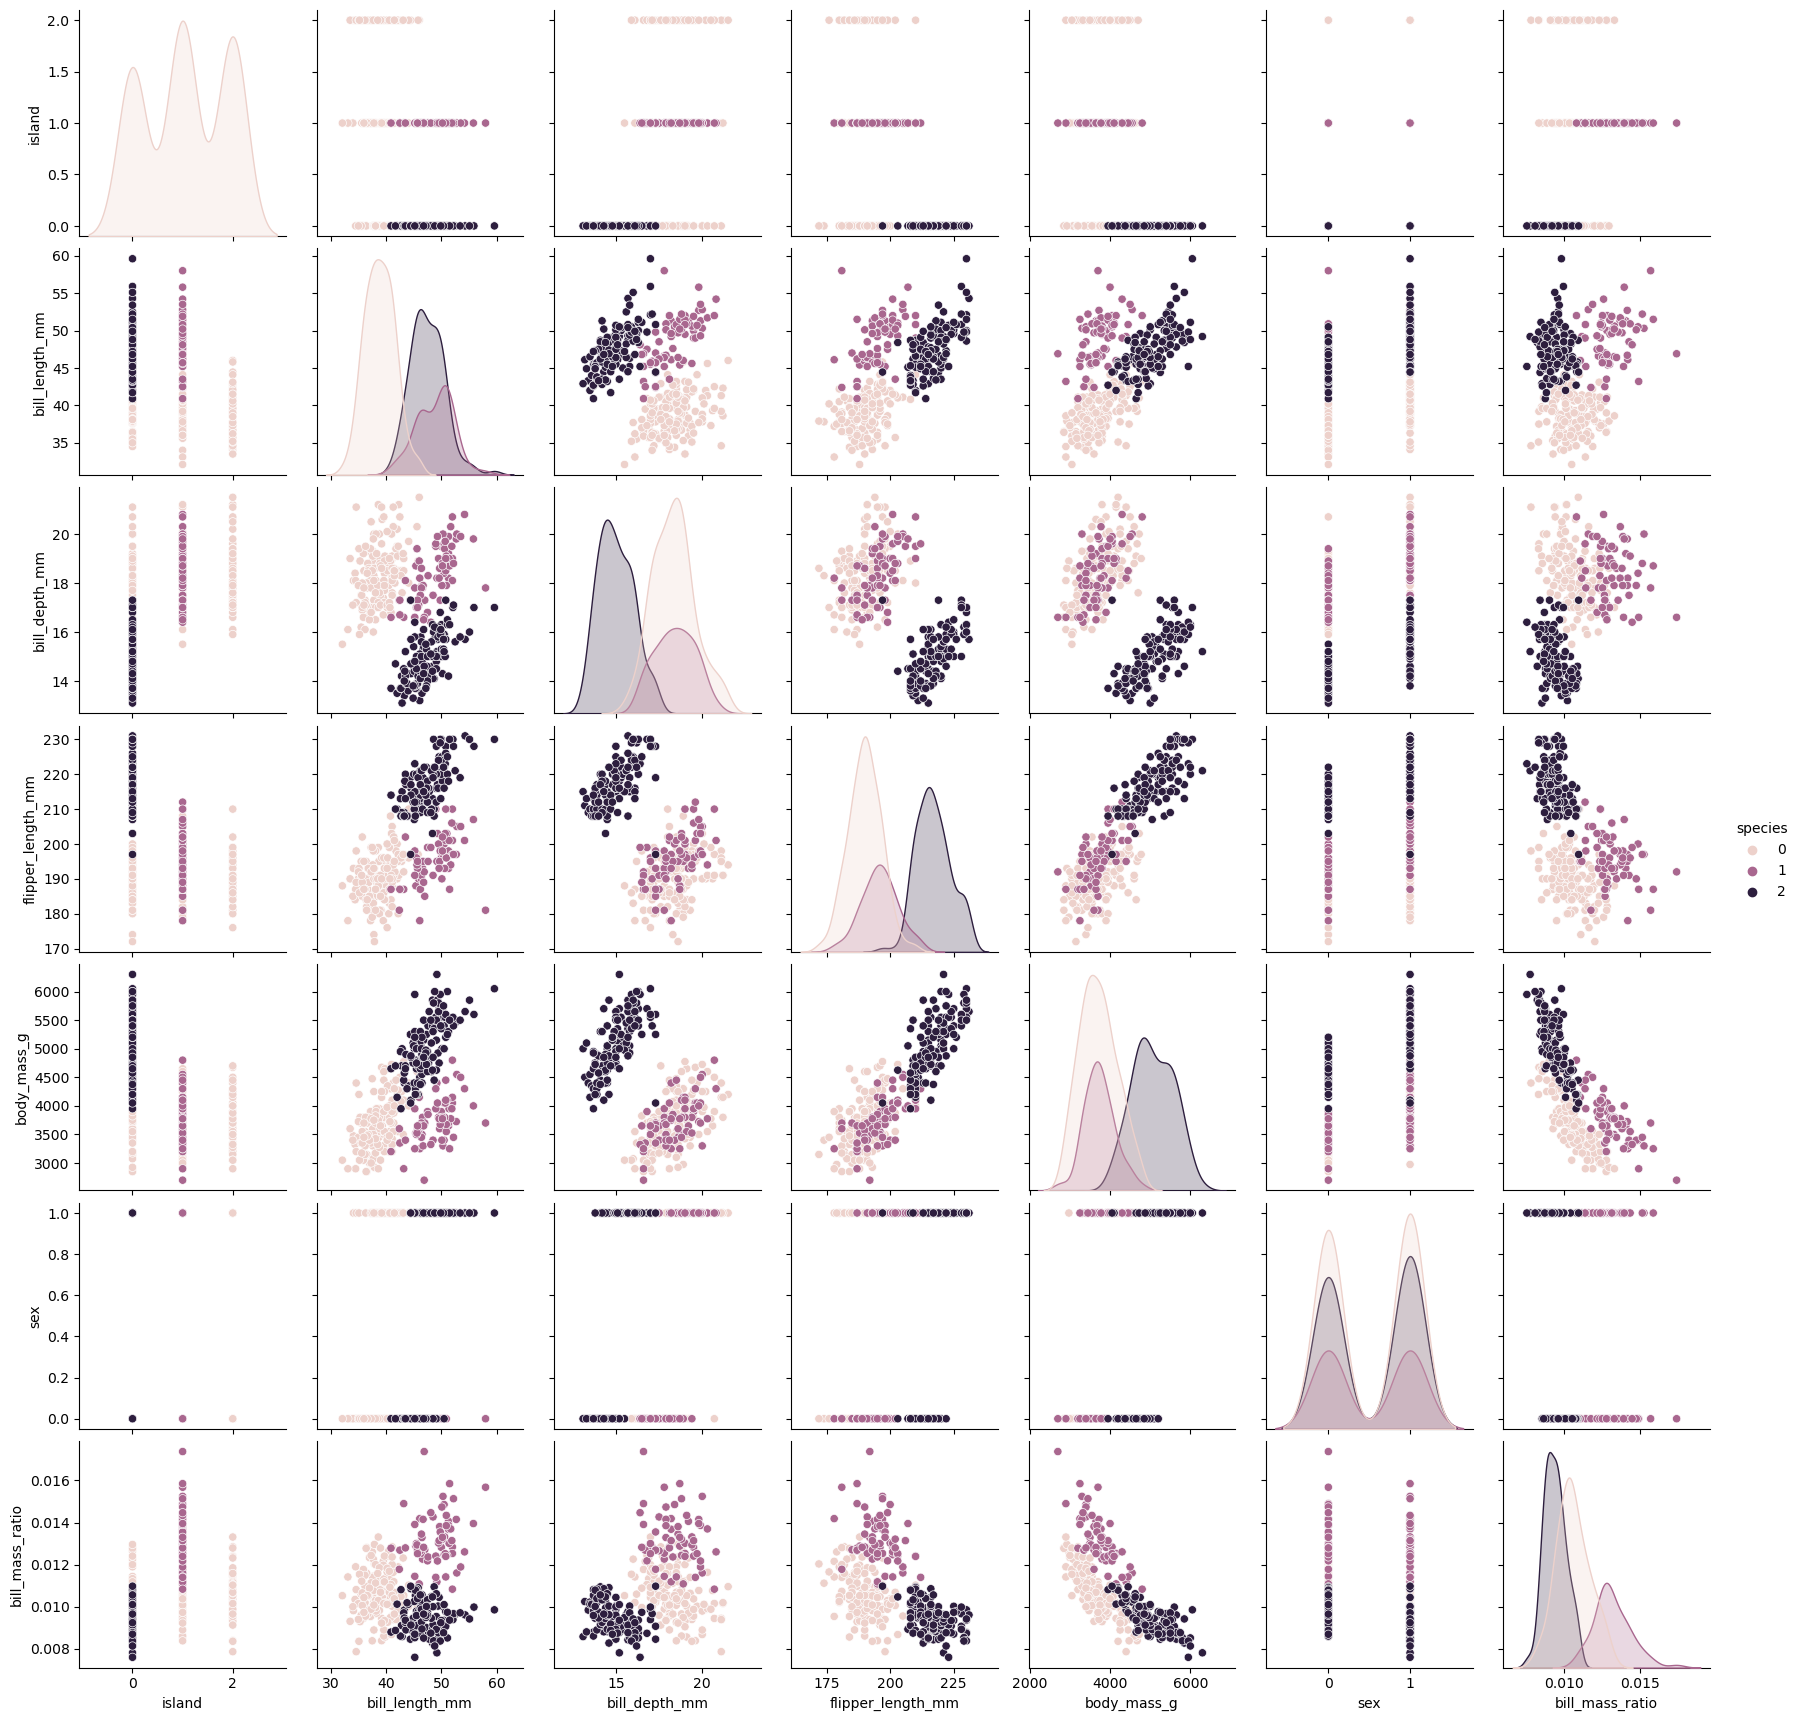

In [15]:
sns.pairplot(df, hue='species')


In [17]:
# Чтение CSV-файла
df = pd.read_csv('submission.csv')

# Посмотрим на первые несколько строк файла
print(df.head())  # Выводит первые 5 строк


   id  species
0   1        1
1   2        1
2   3        2
3   4        1
4   5        2


In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Пример данных
df = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'species': [1, 1, 2, 1, 2]
})

# Инициализация LabelEncoder и обучение на исходных метках
label_encoder = LabelEncoder()

# Пример оригинальных меток (строковые)
original_labels = ['Adelie', 'Gentoo', 'Chinstrap']

# Обучаем LabelEncoder на оригинальных метках
label_encoder.fit(original_labels)

# Преобразуем числовые метки обратно в строковые
df['species'] = label_encoder.inverse_transform(df['species'])

# Выводим обновленные данные
print(df)


   id    species
0   1  Chinstrap
1   2  Chinstrap
2   3     Gentoo
3   4  Chinstrap
4   5     Gentoo
